In [73]:
%run imports.py

### Networks

#### Ring Network

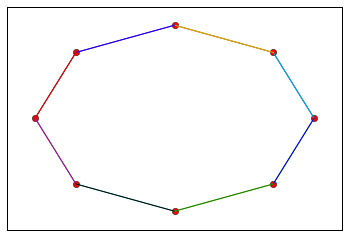

In [74]:
x = Bidirectional_Ring(8)
x.draw()

In [75]:
x.state()

[('P4', {'n': 8}),
 ('P1', {'n': 8}),
 ('P2', {'n': 8}),
 ('P5', {'n': 8}),
 ('P0', {'n': 8}),
 ('P7', {'n': 8}),
 ('P6', {'n': 8}),
 ('P3', {'n': 8})]

#### Line Network

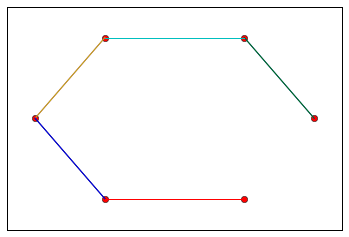

In [76]:
Bidirectional_Line(6).draw()

#### Random Line Network

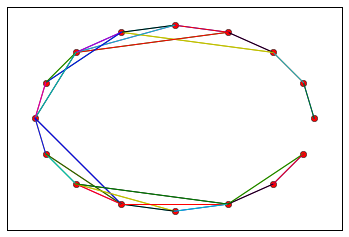

In [77]:
Random_Line_Network(16).draw()

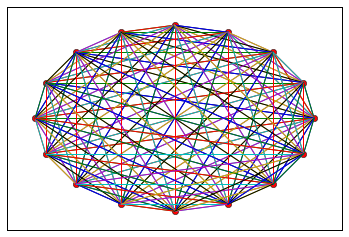

In [78]:
Random_Line_Network(16, sparsity=0).draw()

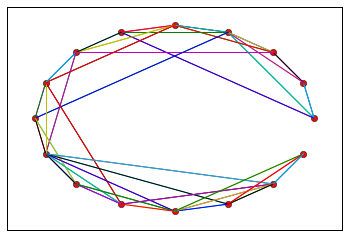

In [79]:
Random_Line_Network(16, sparsity=0.5).draw()

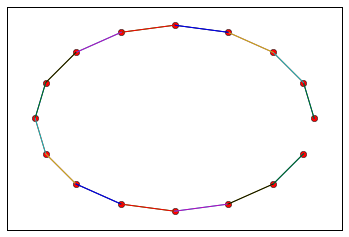

In [80]:
Random_Line_Network(16, sparsity=float('inf')).draw()

### Algorithms

#### A Basic Algorithm: LCR

In [81]:
x = Unidirectional_Ring(5)

##### Initial Network State

In [82]:
x.state()

[('P2', {'n': 5}),
 ('P4', {'n': 5}),
 ('P1', {'n': 5}),
 ('P0', {'n': 5}),
 ('P3', {'n': 5})]

In [83]:
lcr = LCR(x)

--------------
Running LCR on
[P2 -> {P4}, P4 -> {P1}, P1 -> {P0}, P0 -> {P3}, P3 -> {P2}]
Round 1
P2.status is non-leader
P1.status is non-leader
P0.status is non-leader
Round 2
P0.status is non-leader
Round 3
P3.status is non-leader
Round 4
P2.status is non-leader
Round 5
P4.status is leader
Algorithm Terminated
Message Complexity: 11
----------------------


##### Time Complexity

In [84]:
print lcr.r, "rounds"

5 rounds


##### Message Complexity

In [85]:
print lcr.message_count, "messages"

11 messages


##### Final Network State

In [86]:
x.state()

[('P2', {'n': 5, 'status': 'non-leader'}),
 ('P4', {'n': 5, 'status': 'leader'}),
 ('P1', {'n': 5, 'status': 'non-leader'}),
 ('P0', {'n': 5, 'status': 'non-leader'}),
 ('P3', {'n': 5, 'status': 'non-leader'})]